In [17]:
def make_winning_numbers_history(times=1000, number_start=1, number_end=49, ball=6):
    """創建一段時間的樂透歷史數據
    times:期數
    number_start:開始號碼
    number_end:結束號碼
    ball:選取球數
    """
    import random

    winning_numbers_history = []
    for i in range(times):
        winning_numbers = random.sample(list(range(number_start,number_end+1)), ball)
        winning_numbers.sort()
        winning_numbers_history.append(winning_numbers)
    return winning_numbers_history

def make_history_distance_histogram(history=None, analysis_number=1):
    """利用歷史數據求機率list與distance list"""
    ball_in = [i  for i, h in enumerate(history) if analysis_number in h]
    
    distance = []
    for i, dis in enumerate(ball_in):
        if i == 0 and dis != 0:
            distance.append(dis)
        elif i == 0 and dis == 0:
            pass
        else:
            distance.append(ball_in[i]-ball_in[i-1])
            
    probability = [None, len(history)*(6/49)*(6/49)]
    constant = len(history)*(6/49)*(6/49)
    for i in range(max(distance)-1):
        constant *= (43/49)
        probability.append(constant)
    
    return probability, distance

def histogram(distance=None):
    """利用distance求直方圖list"""
    histogram = []
    for i in range(1,max(distance)+1):
        c = distance.count(i)
        histogram.append(c)
    return histogram

In [18]:
times=500
history = make_winning_numbers_history(times=times)   #歷史數據

# 機率與數據比較

In [19]:
analysis_number = 12
probability_list, distance_list = make_history_distance_histogram(history=history, analysis_number=analysis_number)

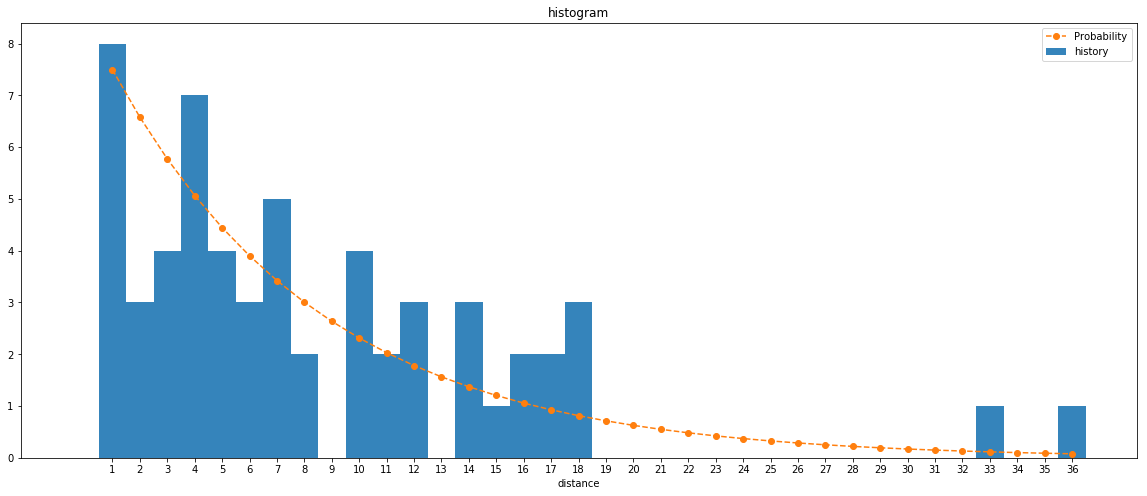

In [21]:
from matplotlib import pyplot as plt 
import numpy as np  

dis = np.array(distance_list) 
pro = np.array(probability_list) 

plt.figure(figsize=(20,8))
plt.hist(dis, bins = list(range(max(dis)+2)), label="history", align="left", alpha=0.9)
plt.plot(pro,'--o', label="Probability") 
plt.legend()
plt.title("histogram") 
plt.xlabel("distance")
plt.xticks(np.arange(1, max(dis)+1, 1))
plt.show() 

In [22]:
histogram_list = histogram(distance=distance_list)  #直方圖list
histogram_list.insert(0, 0)

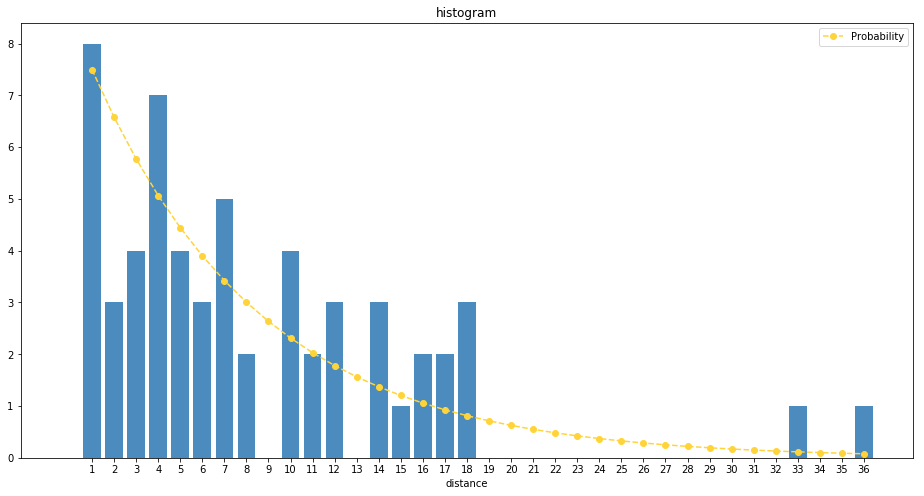

In [23]:
plt.figure(figsize=(16,8))

plt.bar(range(len(histogram_list[:])), histogram_list[:],color=(75/255, 139/255, 190/255, 1))
plt.plot(pro,'--o', label="Probability",color=(255/255, 212/255, 59/255, 1)) 
plt.legend()
plt.title("histogram") 
plt.xlabel("distance")
plt.xticks(np.arange(1, max(dis)+1, 1))
plt.show() 

In [24]:
his = np.array(histogram_list)
pro[0] = 0
diff = his[:]-pro[:]

No handles with labels found to put in legend.


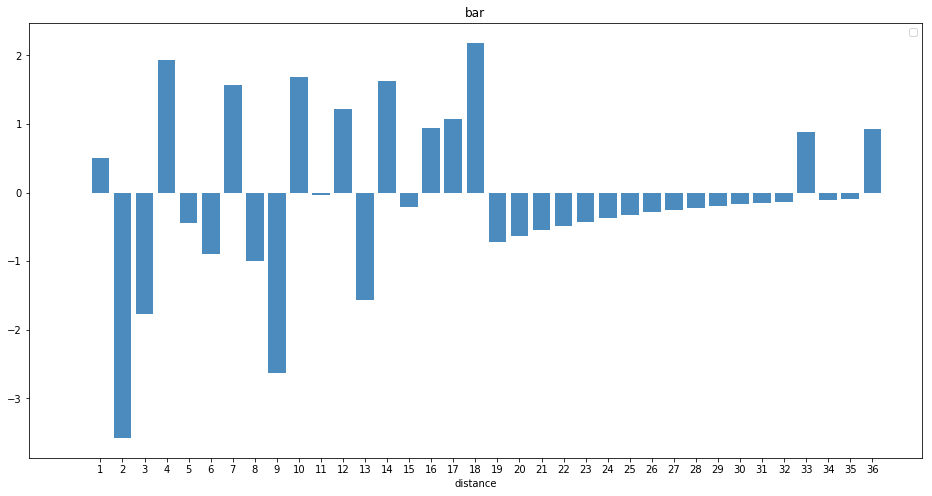

In [25]:
plt.figure(figsize=(16,8))

plt.bar(range(len(diff[:])), diff[:],color=(75/255, 139/255, 190/255, 1))

plt.legend()
plt.title("bar") 
plt.xlabel("distance")
plt.xticks(np.arange(1, max(dis)+1, 1))
plt.show() 

# 分數

In [26]:
histogram_list = histogram(distance=distance_list)  #直方圖list
score = []
for dis_end in range(1,19):
    a = np.array(histogram_list[:])
    b = np.array(probability_list[1:])
    score.append(sum((a-b)[:dis_end]))
score.insert(0, None)

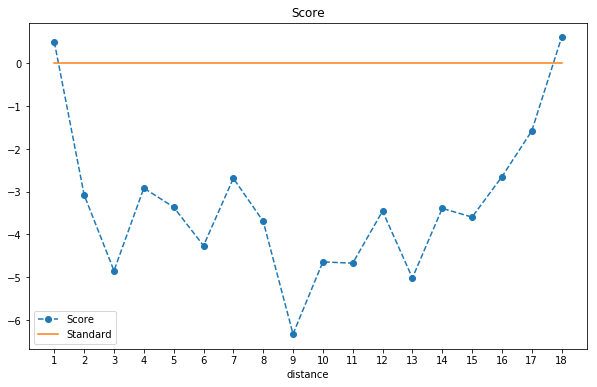

In [27]:
from matplotlib import pyplot as plt 
import numpy as np  


sco = np.array(score) 
x = np.arange(1,len(sco))
y = x*0

plt.figure(figsize=(10,6))
plt.plot(sco,'--o', label="Score") 
plt.plot(x,y, label="Standard")
plt.legend()
plt.title("Score") 
plt.xlabel("distance")
plt.xticks(np.arange(1, len(sco), 1))
plt.show() 